# Análisis de datos.

In [1]:
import pyodbc
import pandas as pd
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en el DataFrame
# Configuración de conexiones
AZURE_SERVER = 'uaxmathfis.database.windows.net'
AZURE_DATABASE = 'usecases'
AZURE_DRIVER = '{ODBC Driver 17 for SQL Server}'
AZURE_AUTH = 'Authentication=ActiveDirectoryInteractive'

# Crear conexión
conn = pyodbc.connect(f"DRIVER={AZURE_DRIVER};SERVER={AZURE_SERVER};DATABASE={AZURE_DATABASE};{AZURE_AUTH}", timeout=10)

# Escribir la consulta SQL
query = """
    SELECT * FROM [usecases].DATAEX.[IA_Client_segment_MODIFICADO]
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
df = pd.read_sql(query, conn)
df.set_index('ID', inplace=True)  # Establecer la columna 'ID' como índice del DataFrame

# Mostrar las primeras filas del DataFrame
df.head()

C:\Users\josit\AppData\Local\Temp\ipykernel_19728\2020501176.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
ID,,,,,,,,,,,,,,,,,
CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385.0,80,True,195,NaN
CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052.0,50,True,360,5.0
CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717.0,30,False,407,3.0
CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606.0,30,False,544,4.0
CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346.0,30,True,170,NaN


In [2]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos = df['Campanna_anno'].unique()
valores_unicos

array([nan,  5.,  3.,  4.,  1.])

1. **Análisis de la columna `Campanna_anno`**: 
    - El código primero obtiene los valores únicos presentes en la columna `Campanna_anno` utilizando `df['Campanna_anno'].unique()`. Esto permite identificar las categorías disponibles (por ejemplo, los años o las campañas realizadas) y explorar la distribución de los datos.
    - Posteriormente, los valores `NaN` en la columna `Campanna_anno` se sustituyen por 0 utilizando `fillna(0, inplace=True)`. Esto se hace bajo la suposición de que los registros con `NaN` no han sido asignados a ninguna campaña, y 0 se utiliza para reflejar esta falta de campaña.

2. **Análisis de las columnas 'Profesion', 'Gastoscore' y 'Provincia'**: 
    - De forma similar, se analiza qué valores están presentes en las columnas `Profesion`, `Gastoscore` y `Provincia`. El objetivo es entender mejor qué datos hay en estas columnas y qué acciones deben tomarse para manejarlas, especialmente si contienen valores `NaN` o datos inesperados.


In [3]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_2 = df['Profesion'].unique()
valores_unicos_2

array(['Ingeniero', 'Medico', 'Artista', 'Funcionario', 'Otros',
       'Ejecutivo', 'Construccion', 'Negocios/empresa', 'Servicios'],
      dtype=object)

In [4]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_3 = df['Gastoscore'].unique()
valores_unicos_3

array(['Bajo', 'Medio', 'Alto'], dtype=object)

In [5]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_4 = df['Provincia'].unique()
valores_unicos_4

array(['Segovia', 'Alicante', 'Toledo', 'Leon', 'LLeida', 'Ciudad Real',
       'i\x81vila', 'Guipiºzcoa', 'Vizcaya', 'Orense', 'Castellon',
       'Pontevedra', 'Almeri\xada', 'Valladolid', 'Jaen', 'Lugo',
       'Santa Cruz de Tenerife', 'Albacete', 'Huelva', 'Salamanca',
       'Ceuta', 'Baleares', 'Gerona', 'Barcelona', 'Sevilla',
       'Guadalajara', 'Soria', 'Caceres', 'Madrid', 'Cordoba', 'Burgos',
       'Cadiz', 'Navarra', 'Melilla', 'Granada', 'Badajoz', 'Valencia',
       'Tarragona', 'La Corui±a', 'Las Palmas', 'Murcia', 'Palencia',
       'La Rioja', 'Teruel', 'Zamora', 'Zaragoza', 'i\x81lava', 'Cuenca',
       'Huesca', 'Malaga'], dtype=object)

### Propósito del código

El objetivo principal del siguiente código es **reducir la granularidad de los datos** y **simplificar** el análisis, agrupando las **provincias** de España en sus **comunidades autónomas** correspondientes. Este enfoque es útil cuando se quiere trabajar con un nivel superior de agregación y no se requiere el análisis a nivel de provincia.

### Detalles de cada paso

1. **Agrupación de provincias a comunidades autónomas**:
    - Se utiliza un **diccionario** para mapear cada **provincia** a su comunidad autónoma correspondiente.
    - Esto permite trabajar con una estructura de datos más general, enfocándose en las **comunidades autónomas** en lugar de las provincias individuales. Es útil para realizar análisis a nivel regional sin centrarse en la granularidad de cada provincia.

2. **Corrección de errores de codificación**:
    - Algunos nombres de provincias tienen caracteres mal codificados debido a problemas en la carga de los datos. Por ejemplo, provincias como **Ávila** y **Álava** se presentan incorrectamente como `i\x81vila` y `i\x81lava`, lo cual se corrige mediante reemplazos específicos de caracteres erróneos. 
    - Esto es necesario para asegurar que los nombres de las provincias sean procesados correctamente y puedan ser mapeados a sus comunidades autónomas sin errores.

3. **Eliminación de la columna 'Provincia'**:
    - Después de realizar el mapeo a comunidades autónomas, la columna `Provincia` ya no es necesaria.
    - Se elimina para **evitar redundancia** y **mantener los datos organizados**, dejando solo la información relevante en la columna `Comunidad`.


In [6]:
provincia_to_comunidad = {
    'i\x81vila': 'Castilla y León',
    'Álava': 'País Vasco',
    'i\x81lava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Guipiºzcoa': 'País Vasco',
    'Baleares': 'Islas Baleares',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Caceres': 'Extremadura',
    'Cadiz': 'Andalucía',
    'Castellon': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Cordoba': 'Andalucía',
    'La Coruña': 'Galicia',
    'Cuenca': 'Castilla-La Mancha',
    'Gerona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Jaen': 'Andalucía',
    'Leon': 'Castilla y León',
    'LLeida': 'Cataluña',
    'La Rioja': 'La Rioja',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Malaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Orense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Las Palmas': 'Canarias',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón',
    'Ceuta': 'Ceuta'
}

# Corregir nombres de provincias mal codificadas
df['Provincia'] = df['Provincia'].str.replace('i\x81', 'Á')  # Ej: i\x81vila → Ávila
df['Provincia'] = df['Provincia'].str.replace('i\x81lava', 'Álava')
df['Provincia'] = df['Provincia'].str.replace('Almeri\xada', 'Almería')
df['Provincia'] = df['Provincia'].str.replace('Guipiºzcoa', 'Guipúzcoa')
df['Provincia'] = df['Provincia'].str.replace('La Corui±a', 'La Coruña')

# Mapear a Comunidad Autónoma
df['Comunidad'] = df['Provincia'].map(provincia_to_comunidad)
df.drop(columns=['Provincia'], inplace=True)

In [7]:
# Definir la clasificación
zonas = {
    'Norte': ['Galicia', 'País Vasco', 'Navarra', 'La Rioja'],
    'Sur': ['Andalucía', 'Extremadura', 'Región de Murcia', 'Canarias', 'Ceuta', 'Melilla'],
    'Este': ['Cataluña', 'Comunidad Valenciana', 'Islas Baleares', 'Aragón'],
    'Oeste': ['Castilla y León', 'Castilla-La Mancha', 'Comunidad de Madrid']
}
df['Zona'] = df['Comunidad'].map(
    {comunidad: zona for zona, comunidades in zonas.items() for comunidad in comunidades}
)
df[df['Zona'].isna()]['Comunidad'].unique()

array([], dtype=object)

In [8]:
df.drop(columns=['Comunidad'], inplace=True)

### Análisis y reorganización de la columna 'Profesión'

Después de preparar los datos territoriales, se realizó una revisión de los **valores únicos** presentes en la columna `Profesión` con el objetivo de entender qué categorías incluía esta variable.

#### Objetivo:
Agrupar las diferentes profesiones en **sectores macroeconómicos** para simplificar el análisis y permitir segmentaciones más generales. Esta agrupación facilita la interpretación de los datos y permite realizar análisis más agregados por áreas profesionales comunes.

#### ¿Por qué es útil?
- Muchas profesiones aparecen con distintas denominaciones específicas que pueden pertenecer a un mismo ámbito (por ejemplo: "enfermero", "médico", "fisioterapeuta" → **Salud/Bienestar**).
- Al unificar estas profesiones en **grupos macro**, se reducen categorías y se gana claridad en el análisis.
- Esta estrategia permite detectar patrones más generales de comportamiento por sector profesional.

#### Resultado:
Se creó una nueva columna o variables dummy que representan la pertenencia de cada individuo a un **sector macroeconómico**, como por ejemplo:
- Administración/Servicios Públicos  
- Arte/Cultura  
- Empresa/Finanzas  
- Salud/Bienestar  
- Tecnología/Industria  
- Otros  

Estas variables se podrán utilizar más adelante en modelos predictivos o segmentaciones para analizar el comportamiento según el perfil laboral.


In [9]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_4 = df['Profesion'].unique()
valores_unicos_4

array(['Ingeniero', 'Medico', 'Artista', 'Funcionario', 'Otros',
       'Ejecutivo', 'Construccion', 'Negocios/empresa', 'Servicios'],
      dtype=object)

In [10]:
sectores_macro = {
    'Tecnología/Industria': ['Ingeniero', 'Construccion'],
    'Salud/Bienestar': ['Medico'],
    'Arte/Cultura': ['Artista'],
    'Administración/Servicios Públicos': ['Funcionario', 'Servicios'],
    'Empresa/Finanzas': ['Ejecutivo', 'Negocios/empresa'],
    'Otros': ['Otros'],
}

# Invertir el diccionario para mapear
profesion_a_sector = {prof: sector for sector, profesiones in sectores_macro.items() for prof in profesiones}
df['Sector_Macro'] = df['Profesion'].map(profesion_a_sector)
df[['Profesion', 'Sector_Macro']].drop_duplicates().sort_values('Sector_Macro')
df[df['Sector_Macro'].isna()]['Profesion'].unique() # Ver profesiones sin sector asignado

array([], dtype=object)

In [11]:
df.drop(columns=['Profesion'], inplace=True)  # Eliminar la columna 'Profesion' si no es necesaria

In [12]:
df.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Zona,Sector_Macro
ID,,,,,,,,,,,,,,,,,
CLI10,F,Si,67,Si,+20annos,Bajo,3,1957,Generacion X,93442,1385.0,80,True,195,NaN,Oeste,Tecnología/Industria
CLI100,M,Si,64,Si,+20annos,Medio,2,1960,Generacion X,99774,1052.0,50,True,360,5.0,Este,Salud/Bienestar
CLI1000,M,Si,65,Si,+20annos,Medio,3,1959,Generacion X,36756,1717.0,30,False,407,3.0,Oeste,Arte/Cultura
CLI10000,M,No,33,No,10-20annos,Bajo,4,1991,Millennials,24616,1606.0,30,False,544,4.0,Oeste,Administración/Servicios Públicos
CLI10001,M,Si,52,No,+20annos,Medio,2,1972,Generacion X,29834,1346.0,30,True,170,NaN,Este,Otros


### Tratamiento de valores nulos

Durante la limpieza de los datos, se detectó la presencia de valores nulos en algunas columnas clave. Se aplicaron diferentes estrategias dependiendo del tipo de variable y la cantidad de valores faltantes.

#### 1. Columna `Campanna_anno`:
- Esta variable indica si un cliente ha recibido alguna campaña de marketing en un año determinado.
- Se interpretó que los valores nulos en esta columna representaban que **el cliente no ha recibido ninguna campaña**, por lo tanto:
  - **Se sustituyeron los valores nulos por 0**, indicando la ausencia de campañas.

#### 2. Columnas `Casado` y `Graduado`:
- Ambas variables contienen información binaria (sí/no) sobre el estado civil y nivel educativo del cliente.
- Se observaron valores nulos en un pequeño porcentaje de los registros (alrededor del **1%** del total).
- Dado que este porcentaje es muy bajo y estas variables son relevantes para el análisis:
  - **Se optó por eliminar esos registros con valores nulos** para evitar introducir sesgos imputando valores y mantener la consistencia en el dataset.

Estas decisiones permiten mantener un conjunto de datos más limpio y coherente, sin perder una cantidad significativa de información.


In [13]:
# Contar valores nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos

Genero                          0
Casado                        190
Edad                            0
Graduado                      103
Experiencia_laboral             0
Gastoscore                      0
Family_Size                     0
anno_nacimiento                 0
Generacion                      0
Ingresos_anuales_brutos         0
Digital_encuesta                0
Gasto_medio_mensual_cuota       0
Abandono                        0
Dias_cliente                    0
Campanna_anno                5707
Zona                            0
Sector_Macro                    0
dtype: int64

In [14]:
# Eliminar filas con nulos en 'Casado' o 'Graduado' y asegurar copia
df_clean = df.dropna(subset=['Casado', 'Graduado']).copy()

# Rellenar nulos en 'Campanna_anno' sin warnings
df_clean['Campanna_anno'] = df_clean['Campanna_anno'].fillna(0)

# Verificar cuántas filas se eliminaron
print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar nulos: {len(df_clean)}")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")

Filas originales: 10806
Filas después de eliminar nulos: 10518
Filas eliminadas: 288


In [15]:
df_clean.isnull().sum()

Genero                       0
Casado                       0
Edad                         0
Graduado                     0
Experiencia_laboral          0
Gastoscore                   0
Family_Size                  0
anno_nacimiento              0
Generacion                   0
Ingresos_anuales_brutos      0
Digital_encuesta             0
Gasto_medio_mensual_cuota    0
Abandono                     0
Dias_cliente                 0
Campanna_anno                0
Zona                         0
Sector_Macro                 0
dtype: int64

In [16]:
# Calcular cuartiles y rango intercuartílico (IQR)
Q1 = df_clean['Ingresos_anuales_brutos'].quantile(0.1)
Q3 = df_clean['Ingresos_anuales_brutos'].quantile(0.9)
IQR = Q3 - Q1

# Definir límites para considerar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame sin los outliers
df_clean = df_clean[(df_clean['Ingresos_anuales_brutos'] >= limite_inferior) & 
                      (df_clean['Ingresos_anuales_brutos'] <= limite_superior)]


In [17]:
# Calcular cuartiles y rango intercuartílico (IQR)
Q1 = df_clean['Digital_encuesta'].quantile(0.1)
Q3 = df_clean['Digital_encuesta'].quantile(0.9)
IQR = Q3 - Q1

# Definir límites para considerar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar el DataFrame sin los outliers
df_clean = df_clean[(df_clean['Digital_encuesta'] >= limite_inferior) & 
                      (df_clean['Digital_encuesta'] <= limite_superior)]

In [18]:
df_clean.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Zona,Sector_Macro
ID,,,,,,,,,,,,,,,,,
CLI10,F,Si,67,Si,+20annos,Bajo,3,1957,Generacion X,93442,1385.0,80,True,195,0.0,Oeste,Tecnología/Industria
CLI100,M,Si,64,Si,+20annos,Medio,2,1960,Generacion X,99774,1052.0,50,True,360,5.0,Este,Salud/Bienestar
CLI1000,M,Si,65,Si,+20annos,Medio,3,1959,Generacion X,36756,1717.0,30,False,407,3.0,Oeste,Arte/Cultura
CLI10000,M,No,33,No,10-20annos,Bajo,4,1991,Millennials,24616,1606.0,30,False,544,4.0,Oeste,Administración/Servicios Públicos
CLI10001,M,Si,52,No,+20annos,Medio,2,1972,Generacion X,29834,1346.0,30,True,170,0.0,Este,Otros


In [19]:
df_clean.nunique()

Genero                          2
Casado                          2
Edad                           69
Graduado                        2
Experiencia_laboral             3
Gastoscore                      3
Family_Size                     9
anno_nacimiento                67
Generacion                      4
Ingresos_anuales_brutos      9404
Digital_encuesta              176
Gasto_medio_mensual_cuota       5
Abandono                        2
Dias_cliente                  571
Campanna_anno                   5
Zona                            4
Sector_Macro                    6
dtype: int64

### Clasificación de variables en continuas y categóricas

En el siguiente bloque de código se realiza una **clasificación automática de las variables del dataset** (`df`) en dos grupos:

#### Objetivo:
Separar las variables en:
- **Variables continuas**: aquellas con muchos valores distintos o que son numéricas.
- **Variables categóricas**: aquellas con pocos valores únicos y que representan categorías o clases.

#### ¿Qué hace el código?

1. Se inicializan dos listas vacías:
   - `v_continuas`: para guardar los nombres de las variables continuas.
   - `v_categoricas`: para las variables categóricas.

2. Se recorre cada columna del DataFrame:
   - Si el número de valores únicos es mayor a 25 **o** el tipo de dato es numérico (`float64` o `int64`), se considera una variable **continua**.
   - En caso contrario, se clasifica como **categórica**.

3. Finalmente, se imprime el listado de variables clasificadas como continuas y categóricas.

#### ¿Por qué se hace esto?
Esta separación es importante para los siguientes pasos del análisis:
- Las **variables continuas** se tratan con técnicas estadísticas o de normalización.
- Las **variables categóricas** suelen codificarse con one-hot encoding o análisis de frecuencias.
Esta clasificación ayuda a preparar adecuadamente los datos antes de aplicar modelos o análisis exploratorio.


In [20]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if df[i].nunique() > 25 or df[i].dtypes in ['float64', 'int64']:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: Edad, Family_Size, anno_nacimiento, Ingresos_anuales_brutos, Digital_encuesta, Gasto_medio_mensual_cuota, Dias_cliente, Campanna_anno
Variables categóricas: Genero, Casado, Graduado, Experiencia_laboral, Gastoscore, Generacion, Abandono, Zona, Sector_Macro


In [21]:
df_clean[v_categoricas].nunique()

Genero                 2
Casado                 2
Graduado               2
Experiencia_laboral    3
Gastoscore             3
Generacion             4
Abandono               2
Zona                   4
Sector_Macro           6
dtype: int64

In [22]:
for i in v_categoricas:
    print(i, df_clean[i].unique()) 

Genero ['F' 'M']
Casado ['Si' 'No']
Graduado ['Si' 'No']
Experiencia_laboral ['+20annos' '10-20annos' '<10annos']
Gastoscore ['Bajo' 'Medio' 'Alto']
Generacion ['Generacion X' 'Millennials' 'Generacion Silenciosa' 'Generacion Z']
Abandono [ True False]
Zona ['Oeste' 'Este' 'Norte' 'Sur']
Sector_Macro ['Tecnología/Industria' 'Salud/Bienestar' 'Arte/Cultura'
 'Administración/Servicios Públicos' 'Otros' 'Empresa/Finanzas']


### Codificación de variables categóricas binarias con Label Encoding

Antes de aplicar modelos de machine learning, es necesario convertir las variables categóricas en formatos numéricos. Este bloque de código aplica **Label Encoding** a las variables categóricas binarias.

#### Objetivo:
Transformar las variables categóricas binarias (que tienen solo dos categorías, como "Sí"/"No" o "Hombre"/"Mujer") en valores numéricos (0 y 1), lo cual es un requisito para la mayoría de algoritmos de modelado.

#### Detalles del código:

1. Se crea una copia del DataFrame original `df_clean` llamada `df_clean2` para trabajar sin modificar los datos originales.

2. Se definen las columnas que contienen variables binarias en la lista `label_cols`:
   - `Genero`
   - `Casado`
   - `Graduado`
   - `Abandono`

3. Se instancia un codificador `LabelEncoder` de `sklearn`.

4. Se recorre cada columna en `label_cols` y se aplica el `LabelEncoder`:
   - Cada categoría se convierte en un número (usualmente 0 y 1 en el caso binario).

#### ¿Por qué Label Encoding?
- Es rápido y adecuado para variables con solo dos clases.
- Permite mantener el DataFrame limpio y listo para análisis o modelado.

> ⚠️ Nota: Si las variables tuviesen más de dos categorías sin orden implícito, sería preferible usar **One-Hot Encoding** para evitar introducir una jerarquía artificial.


In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_clean2 = df_clean.copy()

# --- Label Encoding para categóricas binarias ---
label_cols = ['Genero', 'Casado', 'Graduado', "Abandono" ]
le = LabelEncoder()
for col in label_cols:
    df_clean2[col] = le.fit_transform(df_clean2[col])

### Codificación ordinal de variables categóricas con orden lógico

Este bloque de código transforma variables categóricas ordinales (es decir, aquellas con un **orden natural entre categorías**) en valores numéricos, utilizando `OrdinalEncoder` de `sklearn`.

#### Objetivo:
Codificar variables con un **significado jerárquico** o **progresivo** (por ejemplo: "bajo", "medio", "alto") en valores numéricos que respeten ese orden.

#### Variables a codificar:
1. `Experiencia_laboral`:
   - Categorías: `<10annos`, `10-20annos`, `+20annos`
   - Orden natural basado en la cantidad de años de experiencia.

2. `Generacion`:
   - Categorías: `Generacion Silenciosa`, `Generacion X`, `Millennials`, `Generacion Z`
   - Orden cronológico por año de nacimiento.

3. `Gastoscore`:
   - Categorías: `Bajo`, `Medio`, `Alto`
   - Representa un nivel creciente de capacidad de gasto.

#### ¿Qué hace el código?
- Se define el **orden lógico** de las categorías para cada columna.
- Se agrupan los órdenes en una lista `ordenes`.
- Se instancia un `OrdinalEncoder` con esos órdenes explícitos.
  - Esto asegura que, al codificar, el valor numérico refleje la posición jerárquica de cada categoría.

> ✅ Esta codificación es esencial cuando el orden de las categorías influye en el análisis o el modelo, ya que permite a los algoritmos captar relaciones que dependen del rango o progresión de estas variables.


In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Columnas a codificar
ordinal_cols = ['Experiencia_laboral', 'Generacion', 'Gastoscore']

# Definimos el orden lógico de cada categoría
orden_experiencia = ['<10annos', '10-20annos', '+20annos']
orden_generacion = ['Generacion Silenciosa', 'Generacion X', 'Millennials', 'Generacion Z']
orden_gastoscore = ['Bajo', 'Medio', 'Alto']

# Combinamos los órdenes en una lista
ordenes = [orden_experiencia, orden_generacion, orden_gastoscore]

# Instanciamos el encoder con los órdenes
oe = OrdinalEncoder(categories=ordenes)


In [25]:
# Aplicar OrdinalEncoder
df_clean2[ordinal_cols] = oe.fit_transform(df_clean2[ordinal_cols])


### Codificación One-Hot de variables categóricas no ordinales

EL siguiente bloque de código aplica **One-Hot Encoding** a las variables categóricas **nominales**, es decir, aquellas sin un orden lógico entre sus categorías (por ejemplo: zonas geográficas o sectores profesionales).

#### Objetivo:
Transformar columnas con múltiples categorías en múltiples columnas binarias (0 o 1), una por cada categoría. Esto permite que los algoritmos de machine learning trabajen con estas variables sin asumir un orden entre las clases.

#### ¿Qué hace el código?

1. Se define la lista `onehot_vars` que contiene las columnas a codificar:
   - `'Zona'`: Categorías como Este, Oeste, Norte, Sur, etc.
   - `'Sector_Macro'`: Categorías como Tecnología, Salud, Finanzas, etc.

2. Se aplica `pd.get_dummies()` sobre `df_clean2`:
   - Se generan columnas dummy para cada categoría de las variables listadas.
   - Se mantiene la columna para cada categoría (`drop_first=False`) para no perder información.

3. Finalmente, se asegura que **todas las columnas que no son dummies** estén en formato `int`, lo cual es útil para mantener consistencia y evitar errores en procesos posteriores (por ejemplo, al aplicar modelos que no admiten tipos mixtos).

> ⚠️ Importante: Este paso es fundamental para preparar los datos antes de modelar, ya que muchos algoritmos no pueden manejar variables categóricas directamente y requieren variables numéricas.


In [26]:
# Asumimos que 'onehot_vars' son las columnas a convertir en variables dummies
onehot_vars = ['Zona', 'Sector_Macro']

# Aplicar One-Hot Encoding a las columnas seleccionadas en df_clean2
df_clean2 = pd.get_dummies(df_clean2, columns=onehot_vars, drop_first=False)

# Convertir las columnas que no son dummies a tipo int
df_clean2[df_clean2.columns.difference(onehot_vars)] = df_clean2[df_clean2.columns.difference(onehot_vars)].astype(int)

In [27]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Zona_Este,Zona_Norte,Zona_Oeste,Zona_Sur,Sector_Macro_Administración/Servicios Públicos,Sector_Macro_Arte/Cultura,Sector_Macro_Empresa/Finanzas,Sector_Macro_Otros,Sector_Macro_Salud/Bienestar,Sector_Macro_Tecnología/Industria
ID,,,,,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,67,1,2,0,3,1957,1,93442,1385,80,1,195,0,0,0,1,0,0,0,0,0,0,1
CLI100,1,1,64,1,2,1,2,1960,1,99774,1052,50,1,360,5,1,0,0,0,0,0,0,0,1,0
CLI1000,1,1,65,1,2,1,3,1959,1,36756,1717,30,0,407,3,0,0,1,0,0,1,0,0,0,0
CLI10000,1,0,33,0,1,0,4,1991,2,24616,1606,30,0,544,4,0,0,1,0,1,0,0,0,0,0
CLI10001,1,1,52,0,2,1,2,1972,1,29834,1346,30,1,170,0,1,0,0,0,0,0,0,1,0,0


In [28]:
df_clean2[v_continuas].nunique()

Edad                           69
Family_Size                     9
anno_nacimiento                67
Ingresos_anuales_brutos      9404
Digital_encuesta              176
Gasto_medio_mensual_cuota       5
Dias_cliente                  571
Campanna_anno                   5
dtype: int64

### One-Hot Encoding para la columna `Campanna_anno`

Tras analizar la columna `Campanna_anno` y comprobar que representa distintas campañas recibidas por los clientes a lo largo de los años (sin un orden claro entre ellas), se decide aplicar **One-Hot Encoding**, como ya se hizo anteriormente con otras variables categóricas nominales.

#### Objetivo:
Transformar cada valor distinto de `Campanna_anno` en una columna binaria para reflejar si un cliente recibió o no una campaña en ese año concreto.

#### ¿Qué hace el código?

1. Se especifica la columna `Campanna_anno` como variable a codificar en la lista `onehot_vars`.

2. Se aplica `pd.get_dummies()` para generar variables dummies:
   - Cada año se convierte en una columna individual.
   - No se descarta ninguna categoría (`drop_first=False`) para mantener toda la información.

3. Se aseguran de que todas las demás columnas en el DataFrame (`df_clean2`) sean del tipo `int`, lo que garantiza coherencia de tipos para pasos posteriores del análisis o modelado.

> ✅ Esta transformación facilita la interpretación y el procesamiento de la variable `Campanna_anno`, ya que convierte su formato categórico en numérico sin asumir ninguna jerarquía entre los distintos años.


In [29]:
# Asumimos que 'onehot_vars' son las columnas a convertir en variables dummies
onehot_vars = ['Campanna_anno']

# Aplicar One-Hot Encoding a las columnas seleccionadas en df_clean2
df_clean2 = pd.get_dummies(df_clean2, columns=onehot_vars, drop_first=False)

# Convertir las columnas que no son dummies a tipo int
df_clean2[df_clean2.columns.difference(onehot_vars)] = df_clean2[df_clean2.columns.difference(onehot_vars)].astype(int)

In [30]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Zona_Este,Zona_Norte,Zona_Oeste,Zona_Sur,Sector_Macro_Administración/Servicios Públicos,Sector_Macro_Arte/Cultura,Sector_Macro_Empresa/Finanzas,Sector_Macro_Otros,Sector_Macro_Salud/Bienestar,Sector_Macro_Tecnología/Industria,Campanna_anno_0,Campanna_anno_1,Campanna_anno_3,Campanna_anno_4,Campanna_anno_5
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,67,1,2,0,3,1957,1,93442,1385,80,1,195,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
CLI100,1,1,64,1,2,1,2,1960,1,99774,1052,50,1,360,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
CLI1000,1,1,65,1,2,1,3,1959,1,36756,1717,30,0,407,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
CLI10000,1,0,33,0,1,0,4,1991,2,24616,1606,30,0,544,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
CLI10001,1,1,52,0,2,1,2,1972,1,29834,1346,30,1,170,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [31]:
v_continuas.remove('Campanna_anno')
v_continuas.remove('Family_Size')

In [32]:
df_clean2[v_continuas].head()

,Edad,anno_nacimiento,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Dias_cliente
ID,,,,,,
CLI10,67,1957,93442,1385,80,195
CLI100,64,1960,99774,1052,50,360
CLI1000,65,1959,36756,1717,30,407
CLI10000,33,1991,24616,1606,30,544
CLI10001,52,1972,29834,1346,30,170


### Escalado de variables continuas con StandardScaler

En esta etapa, se normalizan las variables continuas del dataset utilizando `StandardScaler` de `sklearn`.

#### Objetivo:
Aplicar un **escalado estándar (z-score)** para que todas las variables continuas tengan media 0 y desviación estándar 1. Esto es especialmente importante cuando:
- Se va a aplicar análisis como PCA (Análisis de Componentes Principales).
- Se utilizan modelos sensibles a la escala de los datos (por ejemplo, regresión logística, KNN, SVM).

#### ¿Qué hace el código?

1. Se asume que `v_continuas` es una lista previamente definida con las columnas continuas del DataFrame.

2. Se instancia un objeto `StandardScaler()`.

3. Se aplica el método `fit_transform()` a las columnas de `v_continuas`:
   - Calcula la media y desviación estándar de cada columna.
   - Sustituye los valores originales por su z-score correspondiente.

4. Finalmente, se muestran las primeras filas de las columnas escaladas para comprobar el resultado.

> ✅ Este paso asegura que todas las variables continuas estén en la misma escala, lo cual mejora la estabilidad numérica y el rendimiento de muchos algoritmos de machine learning.


In [33]:
from sklearn.preprocessing import StandardScaler

# Asumiendo que 'v_continuas' es una lista de las columnas continuas a escalar
# Aplicar StandardScaler a las columnas continuas
scaler = StandardScaler()

# Escalar las columnas continuas
df_clean2[v_continuas] = scaler.fit_transform(df_clean2[v_continuas])
df_clean2[["Experiencia_laboral", "Gastoscore", "Family_Size", "Generacion"]] = scaler.fit_transform(df_clean2[["Experiencia_laboral", "Gastoscore", "Family_Size", "Generacion"]])
	
# Mostrar las primeras filas de las columnas escaladas
df_clean2[v_continuas].head()

,Edad,anno_nacimiento,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Dias_cliente
ID,,,,,,
CLI10,1.035193,-1.034961,1.046491,0.227665,1.219075,-0.690234
CLI100,0.871003,-0.870768,1.225402,-0.309165,0.166536,0.419009
CLI1000,0.925733,-0.925499,-0.555169,0.762884,-0.535157,0.734975
CLI10000,-0.825626,0.825894,-0.898184,0.583940,-0.535157,1.655983
CLI10001,0.214243,-0.213995,-0.750749,0.164793,-0.535157,-0.858302


In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [35]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Zona_Este,Zona_Norte,Zona_Oeste,Zona_Sur,Sector_Macro_Administración/Servicios Públicos,Sector_Macro_Arte/Cultura,Sector_Macro_Empresa/Finanzas,Sector_Macro_Otros,Sector_Macro_Salud/Bienestar,Sector_Macro_Tecnología/Industria,Campanna_anno_0,Campanna_anno_1,Campanna_anno_3,Campanna_anno_4,Campanna_anno_5
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,1.035193,1,0.768272,-0.732743,0.157964,-1.034961,-0.627333,1.046491,0.227665,1.219075,1,-0.690234,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
CLI100,1,1,0.871003,1,0.768272,0.624361,-0.488915,-0.870768,-0.627333,1.225402,-0.309165,0.166536,1,0.419009,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
CLI1000,1,1,0.925733,1,0.768272,0.624361,0.157964,-0.925499,-0.627333,-0.555169,0.762884,-0.535157,0,0.734975,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
CLI10000,1,0,-0.825626,0,-0.496687,-0.732743,0.804843,0.825894,0.682659,-0.898184,0.583940,-0.535157,0,1.655983,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
CLI10001,1,1,0.214243,0,0.768272,0.624361,-0.488915,-0.213995,-0.627333,-0.750749,0.164793,-0.535157,1,-0.858302,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


### Aplicación de PCA sobre variables con mayor varianza

Tras analizar la varianza de las distintas columnas del dataset, se seleccionan las **12 primeras variables** con mayor capacidad explicativa como las más óptimas para aplicar **PCA (Análisis de Componentes Principales)**.

#### Objetivo:
Reducir la dimensionalidad del dataset manteniendo la **mayor cantidad de varianza posible**, lo cual:
- Mejora la eficiencia computacional.
- Reduce el riesgo de sobreajuste.
- Facilita la visualización de los datos.

#### ¿Qué hace el código?

1. Se seleccionan las primeras 12 columnas del DataFrame `df_clean2`, que son las que presentan mayor varianza, y se almacenan en la variable `X`.

2. Se aplica `PCA` con `n_components=2`, es decir, se busca transformar los datos en dos componentes principales.

3. El método `fit_transform()` calcula los componentes y transforma los datos originales `X` al nuevo espacio reducido `X_pca`.

4. Finalmente, se imprime el número de componentes seleccionados para explicar el **95% de la varianza**.

> ✅ Esta técnica permite representar la información esencial de los datos con solo 2 dimensiones, lo que es muy útil para tareas de exploración visual o como preprocesamiento antes de modelar.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from itertools import combinations
import pandas as pd
import numpy as np

cols_continuas = [
     "Edad",  "Experiencia_laboral",
    "Gastoscore", "Family_Size", "anno_nacimiento", "Generacion",
    "Ingresos_anuales_brutos", "Digital_encuesta", 
    "Gasto_medio_mensual_cuota",  "Dias_cliente"
]
cols_binarias = ["Genero", "Casado","Abandono","Graduado",]

resultados = []

resultados = []

try:
    for r_cont in range(8, 10):  # Combinaciones de 8 a 9 columnas continuas
        for r_bin in range(1, 3):  # Combinaciones de 1 a 2 columnas binarias
            for combo_cont in combinations(cols_continuas, r_cont):
                for combo_bin in combinations(cols_binarias, r_bin):
                    combo = list(combo_cont) + list(combo_bin)
                    X_subset = df_clean2[combo]

                    scaler = StandardScaler()
                    X_scaled = scaler.fit_transform(X_subset)

                    pca = PCA(n_components=2)
                    X_pca = pca.fit_transform(X_scaled)

                    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
                    clusters = kmeans.fit_predict(X_pca)

                    score = silhouette_score(X_pca, clusters)

                    resultados.append({
                        'combo': combo,
                        'score': score,
                        'X_pca': X_pca,
                        'clusters': clusters,
                        'centroids': kmeans.cluster_centers_
                    })

except KeyboardInterrupt:
    print("\n⏹ Interrumpido por el usuario. Mostrando lo que se ha calculado...")

# Ordenar y mostrar
resultados = sorted(resultados, key=lambda x: x['score'], reverse=True)



⏹ Interrumpido por el usuario. Mostrando lo que se ha calculado...


In [ ]:

top_n = 5
for i, res in enumerate(resultados[:top_n]):
    X_pca = res['X_pca']
    clusters = res['clusters']
    centroids = res['centroids']
    combo = res['combo']
    score = res['score']

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
    plt.title(f"Combo: {', '.join(combo)} | Silhouette Score: {score:.2f}")
    plt.xlabel("CP1")
    plt.ylabel("CP2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()



In [ ]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Zona_Este,Zona_Norte,Zona_Oeste,Zona_Sur,Sector_Macro_Administración/Servicios Públicos,Sector_Macro_Arte/Cultura,Sector_Macro_Empresa/Finanzas,Sector_Macro_Otros,Sector_Macro_Salud/Bienestar,Sector_Macro_Tecnología/Industria,Campanna_anno_0,Campanna_anno_1,Campanna_anno_3,Campanna_anno_4,Campanna_anno_5
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLI10,0,1,1.035193,1,0.768272,-0.732743,0.157964,-1.034961,-0.627333,1.046491,0.227665,1.219075,1,-0.690234,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
CLI100,1,1,0.871003,1,0.768272,0.624361,-0.488915,-0.870768,-0.627333,1.225402,-0.309165,0.166536,1,0.419009,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
CLI1000,1,1,0.925733,1,0.768272,0.624361,0.157964,-0.925499,-0.627333,-0.555169,0.762884,-0.535157,0,0.734975,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
CLI10000,1,0,-0.825626,0,-0.496687,-0.732743,0.804843,0.825894,0.682659,-0.898184,0.583940,-0.535157,0,1.655983,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
CLI10001,1,1,0.214243,0,0.768272,0.624361,-0.488915,-0.213995,-0.627333,-0.750749,0.164793,-0.535157,1,-0.858302,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [ ]:
columnas = []
X = df_clean2.copy()
"""X = X[["Casado", "Graduado", "Edad", "Experiencia_laboral", "Family_Size", "anno_nacimiento", "Generacion",  "Digital_encuesta"]]
"""# Seleccionamos solo las primeras 12 columnas
#X = df_clean2.iloc[:, :12]
variables_continuas =  ['Edad', 'Experiencia_laboral', 'Gastoscore', 'Family_Size', 'Generacion', 'Ingresos_anuales_brutos', 'Digital_encuesta', 'Gasto_medio_mensual_cuota']
Variables_binarias = [
    'Casado', "Genero", "Abandono"]
X = df_clean2[variables_continuas + Variables_binarias]
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")

Número de componentes seleccionados para explicar el 95% de la varianza: 2


In [ ]:
# Verifica la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_)}")

# Ejemplo de output:
# [0.65, 0.25] → El primer componente explica el 65% de la varianza, el segundo 25%.

Varianza explicada por cada componente: [0.44890216 0.13040206]
Varianza total explicada: 0.5793042244014399


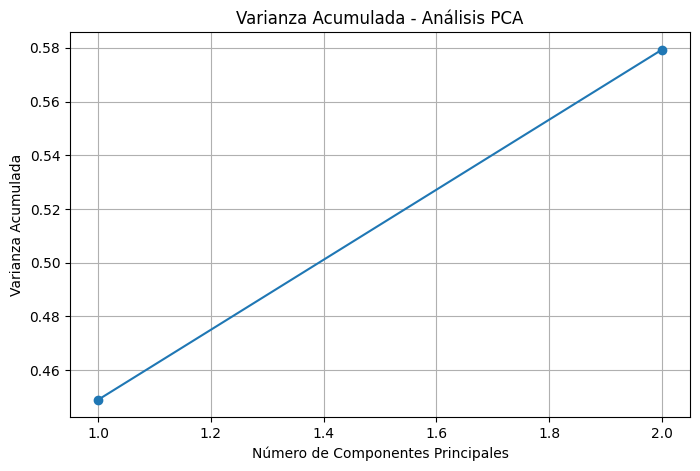

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

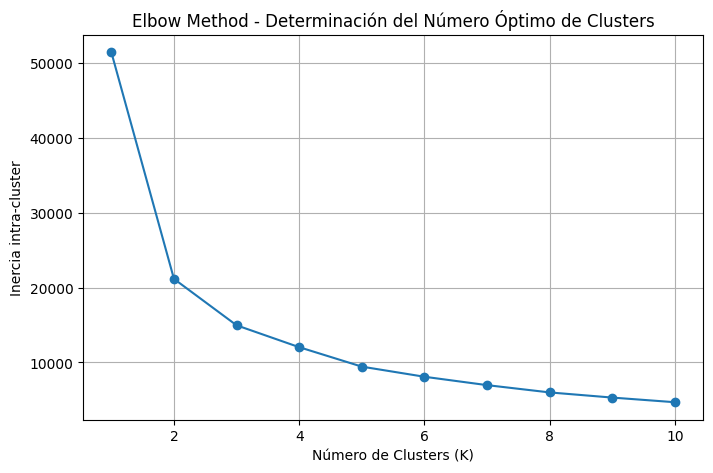

In [ ]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

In [ ]:
clusters = 5 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 5


In [ ]:
kmeans = KMeans(n_clusters=clusters, random_state=42)
df_clean2['Cluster'] = kmeans.fit_predict(X_pca)

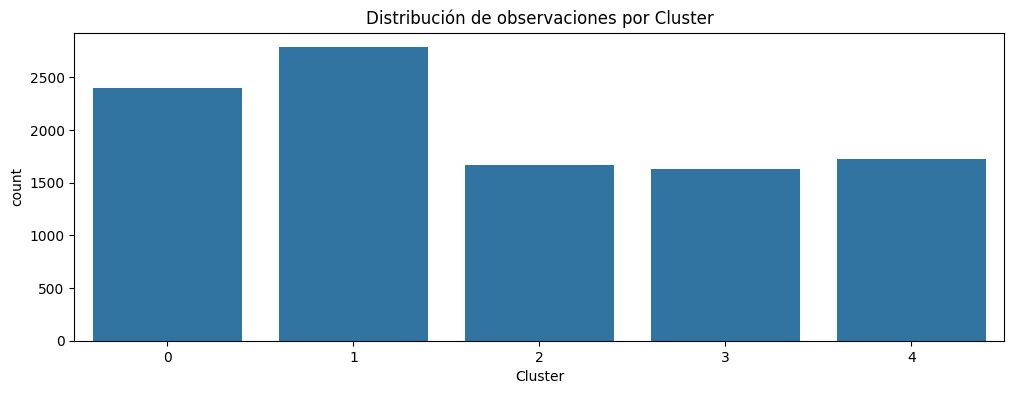

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df_clean2)
plt.title('Distribución de observaciones por Cluster')
plt.show()

### Selección del número óptimo de clusters para K-Means

Para determinar el número óptimo de clusters para el algoritmo **K-Means**, se utilizan dos métodos comunes: el **Método del Codo** y el **Silhouette Score**.

#### Objetivo:
Elegir el número de clusters (`K`) que mejor represente la estructura de los datos de manera que se minimicen los errores dentro de cada cluster y maximice la separación entre ellos.

#### ¿Qué hace el código?

1. **Método del Codo**:
   - Se calcula la **inercia** (suma de las distancias al cuadrado entre los puntos y su centroide) para un rango de valores de `K` (de 2 a 10 clusters).
   - La inercia disminuye a medida que aumentamos `K`, pero a partir de cierto número de clusters, la reducción de la inercia se vuelve marginal.
   - El **codo** en la gráfica muestra el punto donde añadir más clusters no mejora significativamente el modelo, lo que ayuda a determinar el número adecuado de clusters.

   - **Visualización**: La inercia se grafica para los valores de `K` de 2 a 10 para observar el codo.

2. **Silhouette Score**:
   - El **Silhouette Score** mide qué tan bien se ajustan los puntos dentro de sus clusters. Un valor cercano a 1 indica que los puntos están bien agrupados, mientras que valores cercanos a -1 indican que los puntos están mal agrupados.
   - Se calcula el **Silhouette Score** para cada valor de `K` entre 2 y 10.

   - **Visualización**: El Silhouette Score se grafica para los valores de `K` de 2 a 10 para ayudar a identificar el número de clusters con la mejor separación y cohesión.

3. **Selección de Clusters**:
   - A partir del análisis gráfico, se decide que **5 clusters** es la mejor opción, ya que muestra un buen balance entre inercia y Silhouette Score.

> ✅ Estos métodos nos permiten elegir un número adecuado de clusters que captura la estructura subyacente de los datos de manera eficiente y significativa.


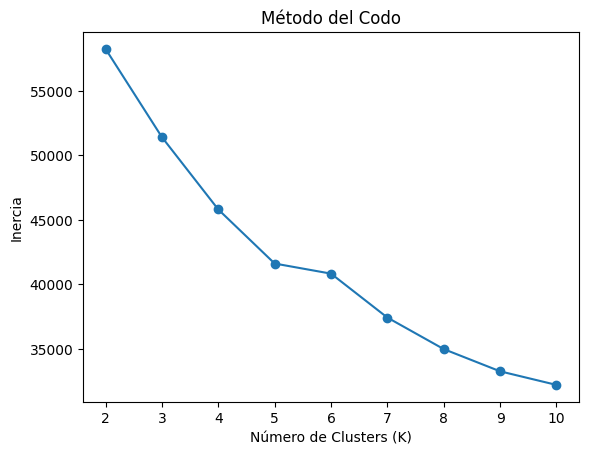

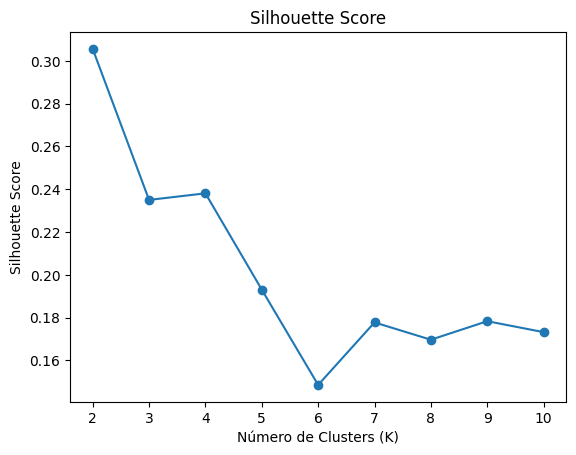

In [ ]:
# Método del Codo
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

### Aplicación de KMeans clustering y visualización

En este paso, se aplica el algoritmo **KMeans** para segmentar los clientes en **5 clusters**. Utilizando los componentes principales generados por **PCA**, se busca agrupar los clientes de acuerdo a sus características de manera que los clientes dentro de cada cluster sean lo más similares posible entre sí.

#### Objetivo:
Segmentar a los clientes en grupos que compartan características similares, facilitando su análisis y el desarrollo de estrategias de marketing específicas para cada grupo.

#### ¿Qué hace el código?

1. **KMeans Clustering**:
   - Se inicializa el modelo `KMeans` con `n_clusters=5`, lo que indica que queremos agrupar a los clientes en 5 clusters.
   - Se ajusta el modelo a los datos transformados por PCA (`X_pca`) utilizando `fit_predict()`. Esto realiza el proceso de clustering y asigna a cada cliente un número de cluster (almacenado en `clusters`).
   - Los **centroides** de los clusters se calculan y se almacenan en `centroids`, representando el centro de cada grupo.

2. **Visualización**:
   - Se utiliza `seaborn` para crear un gráfico de dispersión, donde los clientes se representan en un plano 2D basado en las dos primeras componentes principales (`X_pca[:, 0]` y `X_pca[:, 1]`).
   - Los puntos se colorean según el número de cluster al que pertenecen, utilizando el mapa de colores 'viridis'.
   - Los centroides de cada cluster se destacan con un marcador rojo 'X' para indicar las ubicaciones centrales de cada grupo.

3. **Resultado**:
   - Se muestra la gráfica de los clientes segmentados en 5 clusters, lo que proporciona una visión clara de cómo se agrupan los clientes en función de sus características.

> ✅ Esta visualización facilita la interpretación de los clusters y permite observar la separación de los grupos de clientes en el espacio de las componentes principales.


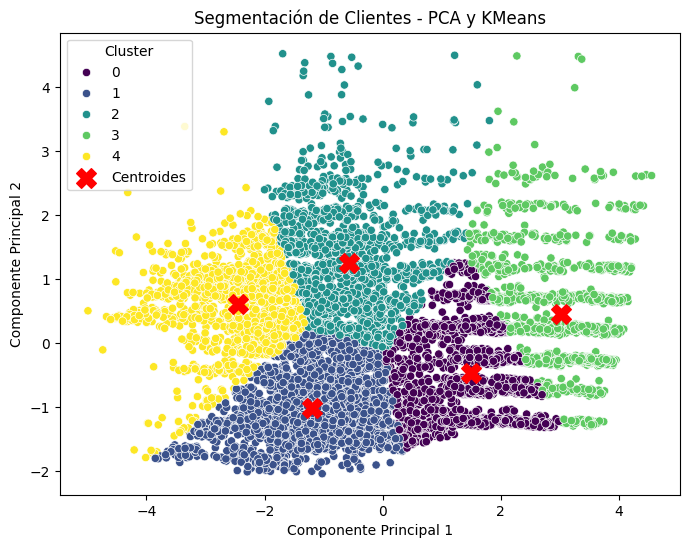

In [ ]:
# KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
plt.title("Segmentación de Clientes - PCA y KMeans")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

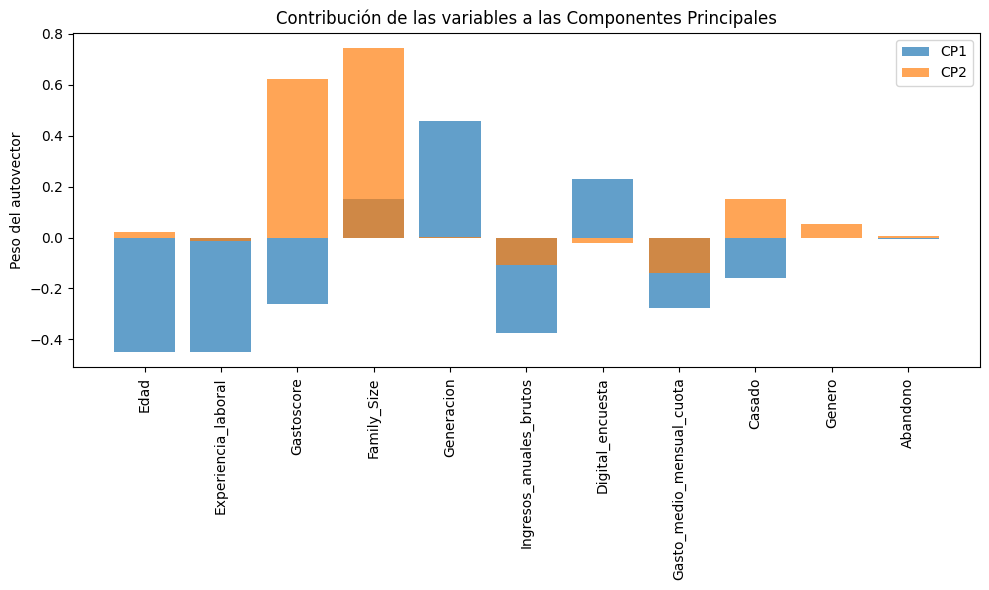

In [ ]:
# Gráfico 2: Autovectores (componentes principales)
components = pca.components_
# Obtener los nombres reales de las variables desde X
features = X.columns.tolist()

plt.figure(figsize=(10,6))
plt.bar(range(1, len(components[0])+1), components[0], alpha=0.7, label='CP1')
plt.bar(range(1, len(components[1])+1), components[1], alpha=0.7, label='CP2')
plt.xticks(range(1, len(features)+1), features, rotation=90)
plt.ylabel("Peso del autovector")
plt.title("Contribución de las variables a las Componentes Principales")
plt.legend()
plt.tight_layout()
plt.show()



### Visualización de los Autovectores del PCA

En esta sección, se visualizan los **autovectores** (componentes principales) resultantes del PCA, que representan las direcciones en las que los datos tienen mayor varianza. Esta visualización ayuda a comprender cómo las características originales contribuyen a las componentes principales.

#### Objetivo:
- Mostrar cómo cada característica del dataset influye en las dos primeras componentes principales.
- Visualizar la relación entre las variables y su contribución a la variabilidad de los datos.

#### ¿Qué hace el código?

1. **Autovectores del PCA**:
   - Se obtienen los **autovectores** del PCA con `pca.components_`, que indican la dirección de mayor varianza en los datos.
   - `explained_variance` calcula el porcentaje de varianza explicada por cada componente principal, permitiendo entender qué tan relevante es cada componente.

2. **Visualización**:
   - Se genera un gráfico de dispersión en el que los **autovectores** se representan como flechas rojas en el espacio de las dos primeras componentes principales (CP1 y CP2).
   - Se anotan los nombres de las características del dataset en las posiciones correspondientes a cada componente, escaladas para que no se superpongan.

3. **Gráfica**:
   - El gráfico tiene líneas horizontales y verticales en cero para facilitar la interpretación.
   - Los ejes están etiquetados con el porcentaje de varianza explicada por las dos primeras componentes principales, proporcionando contexto sobre la importancia de cada una.
   - La visualización muestra cómo las variables contribuyen a las componentes principales, ayudando a identificar las variables que tienen más impacto en la variabilidad de los datos.

> ✅ Este análisis es útil para identificar qué características son las más influyentes en la variabilidad de los datos y cómo se distribuyen en el espacio de las componentes principales.


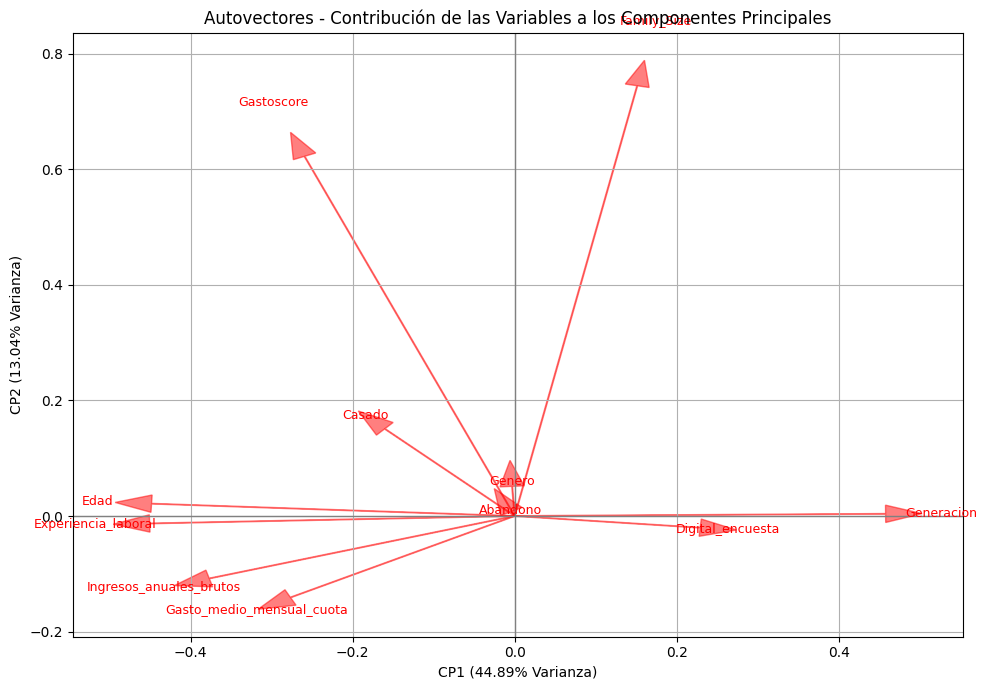

In [ ]:
# Autovectores del PCA
components = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100  # porcentaje de varianza explicada

# Usar los nombres reales de las columnas del dataset X
features = np.array(X.columns.tolist())

plt.figure(figsize=(10, 7))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Dibujar los vectores (autovectores) con nombres reales
for i in range(len(features)):
    plt.arrow(0, 0, components[0, i], components[1, i],
              color='r', alpha=0.5, head_width=0.03)
    plt.text(components[0, i] * 1.15, components[1, i] * 1.15,
             features[i], color='r', ha='center', va='center', fontsize=9)

plt.xlabel(f"CP1 ({explained_variance[0]:.2f}% Varianza)")
plt.ylabel(f"CP2 ({explained_variance[1]:.2f}% Varianza)")
plt.title("Autovectores - Contribución de las Variables a los Componentes Principales")
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Selección de variables
variables_continuas = ['Edad', 'Experiencia_laboral', 'Gastoscore', 'Family_Size',
                       'Generacion', 'Ingresos_anuales_brutos', 'Digital_encuesta',
                       'Gasto_medio_mensual_cuota']
Variables_binarias = ['Casado', 'Genero', 'Abandono']
X = df_clean2[variables_continuas + Variables_binarias]

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Crear el DataFrame final
df_definitivo = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': clusters
})

# Mostrar las primeras filas para confirmar
df_definitivo.head()


,PCA1,PCA2,Cluster
0,-1.629548,-0.579105,1
1,-1.907954,-0.028280,4
2,-0.719984,0.716645,2
3,1.932461,0.227273,0
4,-0.566382,0.260696,2


In [ ]:
# Guardar como CSV
df_definitivo.to_csv('df_definitivo.csv', index=False)

# Guardar como Excel
df_definitivo.to_excel('df_definitivo.xlsx', index=False)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Edad', 'Ingresos_anuales_brutos', 'Gastoscore', 'Family_Size', 'Digital_encuesta']  # pon las que quieras

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_clean2, x='cluster', y=var)
    plt.title(f'{var} por Cluster')
    plt.show()


ValueError: Could not interpret value `cluster` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>